In [1]:
csvfile = "dataV2_cohortV3.csv"

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(csvfile)

In [4]:
# Mapping the variables to numeric values
mapping_dict = {
    'WELLNESS_malach_pines_burnout_measure_depressed': {
        'Never': 0,
        'Almost never': 1,
        'Rarely': 2,
        'Sometimes': 3,
        'Very Often': 4,
        'Always': 5
    }
}

In [5]:
# Map values and rename

# Create columns for OnlineGames and SocialFriends with 'C' (text) and numeric values
df['OnlineGamesC'] = df['CONNECTION_activities_onlinegames_p3m']

df['SocialFriendsC'] = df['CONNECTION_social_time_friends_p7d_grouped']

# Create 'Depression' column with numeric values only
df['DepressionC'] = df['WELLNESS_malach_pines_burnout_measure_depressed']
df['DepressionN'] = df['WELLNESS_malach_pines_burnout_measure_depressed'].map(mapping_dict['WELLNESS_malach_pines_burnout_measure_depressed'])



# Drop the original columns from df
keep_cols = ['OnlineGamesC', 'SocialFriendsC', 'DepressionC', 'DepressionN']
df = df[keep_cols]

In [6]:
# Drop NA
df = df.dropna()

In [7]:
df

,OnlineGamesC,SocialFriendsC,DepressionC,DepressionN
0,Not in the past three months,5 or more hours,Rarely,2.0
1,Not in the past three months,5 or more hours,Almost never,1.0
2,Not in the past three months,5 or more hours,Almost never,1.0
3,Weekly,1 to 4 hours,Rarely,2.0
4,Weekly,5 or more hours,Almost never,1.0
...,...,...,...,...
844,Not in the past three months,1 to 4 hours,Always,5.0
845,Not in the past three months,1 to 4 hours,Very Often,4.0
846,Not in the past three months,Less than 1 hour,Always,5.0
847,Not in the past three months,5 or more hours,Sometimes,3.0


In [8]:
# Reorder the categories for OnlineGamesC to make "Not in the past three months" the reference category
df['OnlineGamesC'] = pd.Categorical(df['OnlineGamesC'],
                                           categories=['Not in the past three months', 'Less than monthly', 'Monthly', 
                                                       'A few times a month', 'Weekly', 'A few times a week', 
                                                       'Daily or almost daily'],
                                           ordered=True)

# Reorder the categories for SocialFriendsC to make "No time" the reference category
df['SocialFriendsC'] = pd.Categorical(df['SocialFriendsC'],
                                            categories=['No time', 'Less than 1 hour', '1 to 4 hours', '5 or more hours'],
                                            ordered=True)


In [9]:
# Fit the OLS model using categorical values (OnlineGamesC and SocialFriendsC)
model_categorical = smf.ols("DepressionN ~ C(OnlineGamesC) + C(SocialFriendsC)", data=df).fit()

# Display the regression results
model_categorical.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DepressionN   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.646
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           0.000183
Time:                        17:50:28   Log-Likelihood:                -1166.2
No. Observations:                 687   AIC:                             2352.
Df Residuals:                     677   BIC:                             2398.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    2.8305      0.122     23.195      0.000       2.591       3.070
C(OnlineGamesC)[T.Less than monthly]         0.2377      0.230      1.034      0.301      -0.214       0.689
C(OnlineGamesC)[T.Monthly]                  -0.0532      0.407     -0.131      0.896      -0.852       0.746
C(OnlineGamesC)[T.A few times a month]       0.3543      0.250      1.416      0.157      -0.137       0.846
C(OnlineGamesC)[T.Weekly]                    0.5936      0.290      2.045      0.041       0.024       1.164
C(OnlineGamesC)[T.A few times a week]        0.0816      0.297      0.275      0.783      -0.501       0.664
C(OnlineGamesC)[T.Daily or almost daily]     0.0457      0.203      0.225      0.822      -0.352       0.443
C(SocialFriendsC)[T.Less than 1 hour]       -0.5672      0.162     -3.495      0.001      -0.886      -0.249
C(SocialFriendsC)[T.1 to 4 hours]           -0.5875      0.150     -3.912      0.000      -0.882      -0.293
C(SocialFriendsC)[T.5 or more hours]        -0.7699      0.151     -5.109      0.000      -1.066      -0.474
==============================================================================
Omnibus:                       22.001   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.683
Skew:                          -0.016   Prob(JB):                      0.00479
Kurtosis:                       2.390   Cond. No.                         8.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
df["OnlineGamesB"] = df["OnlineGamesC"] != "Not in the past three months"

In [11]:
# Fit the OLS model using categorical values (OnlineGamesC and SocialFriendsC)
model_categorical = smf.ols("DepressionN ~ C(OnlineGamesB) + C(SocialFriendsC)", data=df).fit()

# Display the regression results
model_categorical.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DepressionN   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     7.342
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           8.61e-06
Time:                        17:50:28   Log-Likelihood:                -1168.0
No. Observations:                 687   AIC:                             2346.
Df Residuals:                     682   BIC:                             2369.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 2.8121      0.121     23.264      0.000       2.575       3.049
C(OnlineGamesB)[T.True]                   0.2123      0.118      1.796      0.073      -0.020       0.444
C(SocialFriendsC)[T.Less than 1 hour]    -0.5530      0.161     -3.442      0.001      -0.868      -0.238
C(SocialFriendsC)[T.1 to 4 hours]        -0.5623      0.149     -3.786      0.000      -0.854      -0.271
C(SocialFriendsC)[T.5 or more hours]     -0.7440      0.150     -4.976      0.000      -1.038      -0.450
==============================================================================
Omnibus:                       24.029   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.388
Skew:                          -0.036   Prob(JB):                      0.00337
Kurtosis:                       2.373   Cond. No.                         5.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
df['SocialFriendsB'] = df['SocialFriendsC'] != 'No time'

In [13]:
df

,OnlineGamesC,SocialFriendsC,DepressionC,DepressionN,OnlineGamesB,SocialFriendsB
0,Not in the past three months,5 or more hours,Rarely,2.0,False,True
1,Not in the past three months,5 or more hours,Almost never,1.0,False,True
2,Not in the past three months,5 or more hours,Almost never,1.0,False,True
3,Weekly,1 to 4 hours,Rarely,2.0,True,True
4,Weekly,5 or more hours,Almost never,1.0,True,True
...,...,...,...,...,...,...
844,Not in the past three months,1 to 4 hours,Always,5.0,False,True
845,Not in the past three months,1 to 4 hours,Very Often,4.0,False,True
846,Not in the past three months,Less than 1 hour,Always,5.0,False,True
847,Not in the past three months,5 or more hours,Sometimes,3.0,False,True


In [14]:
clf = DecisionTreeClassifier(max_depth=10, random_state=10)

y = df['DepressionC']
X = pd.get_dummies(df[['OnlineGamesC', 'SocialFriendsC', 'OnlineGamesB', 'SocialFriendsB']])

In [15]:
clf.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [16]:
fig, ax = plt.subplots(figsize=(100, 100))
plot_tree(clf, ax=ax, fontsize=22, feature_names=X.columns, class_names=clf.classes_)
plt.show()

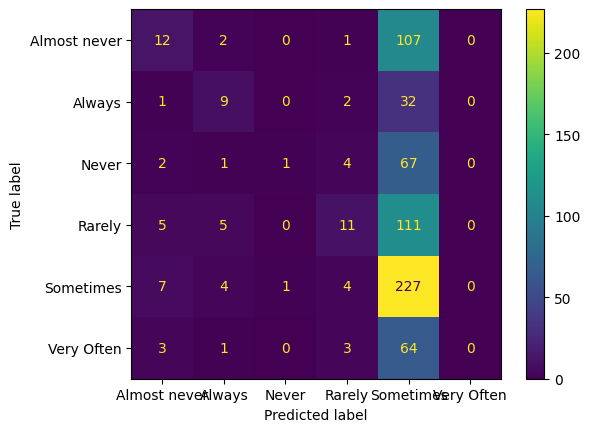

In [17]:
cmatrix = ConfusionMatrixDisplay.from_estimator(clf, X, y)
cmatrix